In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [42]:
# Load the data
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [34]:
df.describe()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,198.687573,104.664299,112.421189,203.053701,193.717925,26.319394,79.448857,1.106696,1.644945,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
min,2021-10-30 00:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,2022-01-29 06:00:45,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,2022-04-30 12:00:30,0.000000,0.000000,0.000000,3.200000,2.900000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,2022-07-30 18:00:15,353.500000,75.400000,220.100000,353.800000,338.500000,29.400000,96.700000,1.900000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,2022-10-30 00:00:00,1094.000000,772.200000,587.300000,1109.200000,1064.000000,39.900000,100.000000,4.800000,6.400000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000
std,NaN,289.288413,201.602546,151.955609,296.231357,283.126225,4.398605,20.520775,1.157374,1.509352,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161


In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [47]:
#from df.discribe() we can see that the columns DHI, DNI, GHI, HAVE NEGATIVE VALUES WHICH IS NOT POSSIBLE
#THEREFORE WE CAN DROP THE ROWS WITH NEGATIVE VALUES
# Create a mask for negative values
mask = (df[['DHI', 'DNI', 'GHI']] < 0).any(axis=1)
# Drop rows with negative values
df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)



In [43]:
df = df.drop(columns=['Comments'])

In [44]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
print(df["Timestamp"].dtypes)

datetime64[ns]


In [49]:
from scipy.stats import zscore

# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z = df[cols].apply(zscore)

# Identify outliers (|Z| > 3)
outliers = (z.abs() > 3)

# Replace outliers with the median of non-outliers
for col in cols:
    mean_non_outliers = df.loc[~outliers[col], col].mean()  # Median of non-outliers
    df.loc[outliers[col], col] = mean_non_outliers  # Replace outliers with median

# Verify the changes
print("Outliers cleaned. Updated dataset:")
print(df[cols].describe())

Outliers cleaned. Updated dataset:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.161461      96.719754     112.134604     203.000177   
std       286.667184     185.697908     150.219262     295.016379   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.300000       0.000000       0.000000       3.600000   
75%       350.500000      96.719754     218.600000     352.500000   
max      1067.000000     709.800000     569.300000    1091.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      193.638871       1.097340       1.626683  
std       281.623016       1.138815       1.480488  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         3.400000     

In [37]:
# After processing (e.g., outlier replacement)
df_cleaned = df.copy()  # Optional: work on a copy to preserve original

# Save to CSV
df_cleaned.to_csv('../data/cleaned_sierraleone_solar_data.csv', index=False)
print("Saved cleaned data to 'cleaned_solar_data.csv'")

Saved cleaned data to 'cleaned_solar_data.csv'


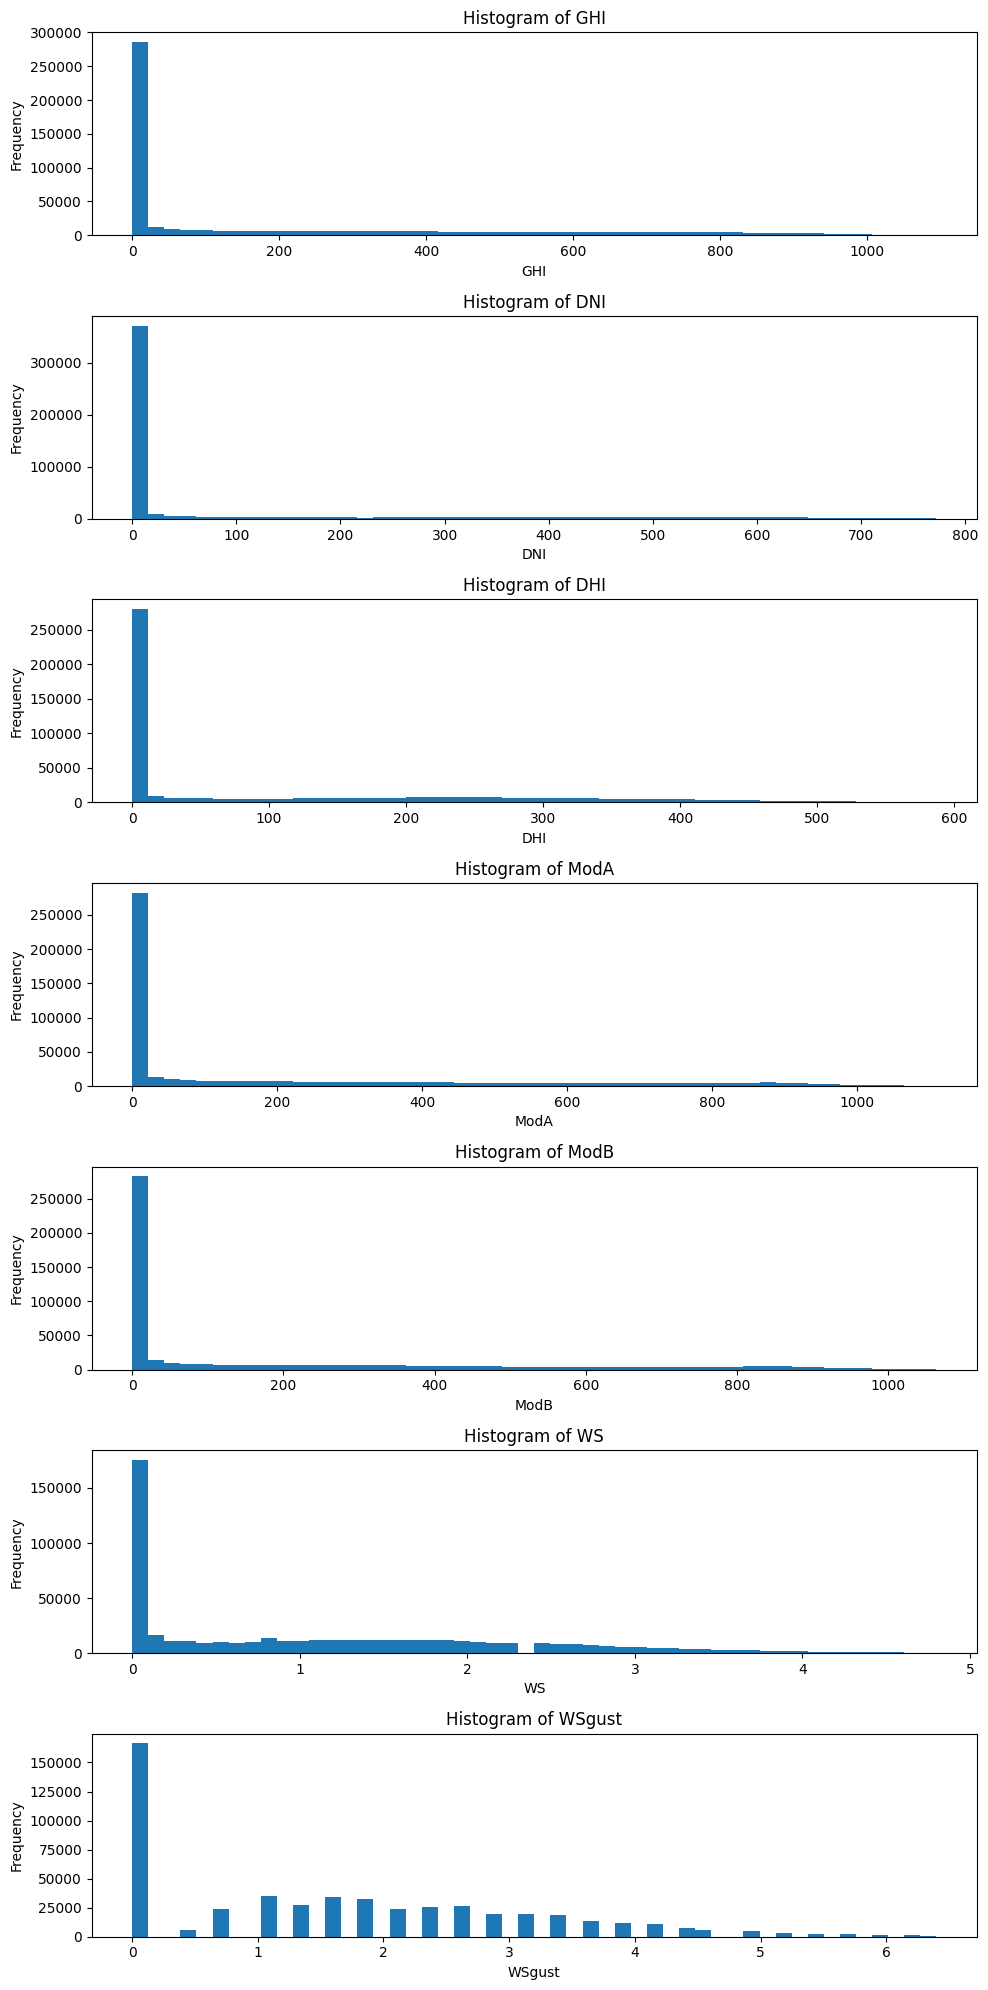

In [29]:
fig, axes = plt.subplots(nrows=len(cols), figsize=(10, 20))  # Adjust size as needed

# Plot histograms for each column
for ax, col in zip(axes, cols):
    df[col].plot.hist(ax=ax, bins=50, title=f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Prevent overlapping labels
plt.show()

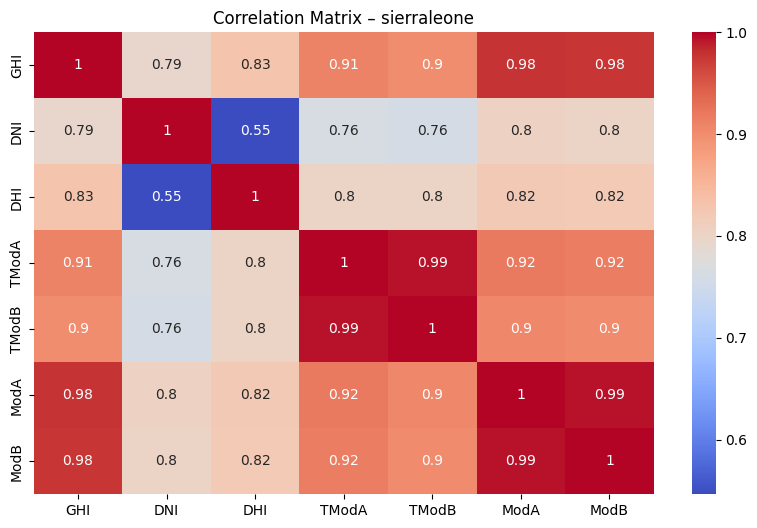

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix – sierraleone")
plt.show()

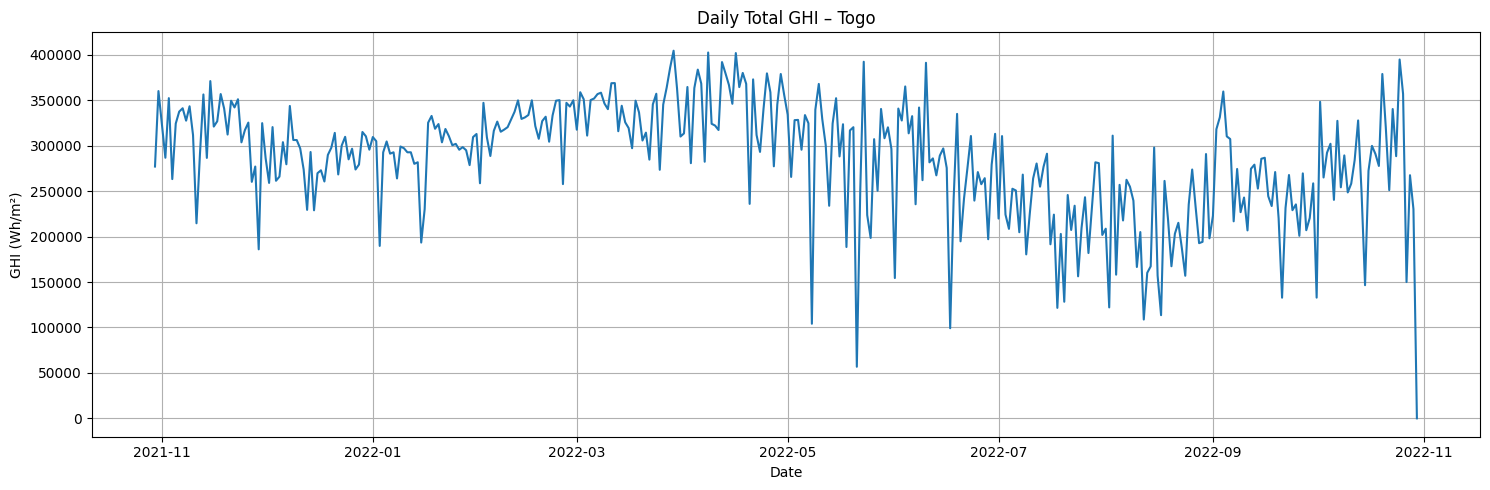

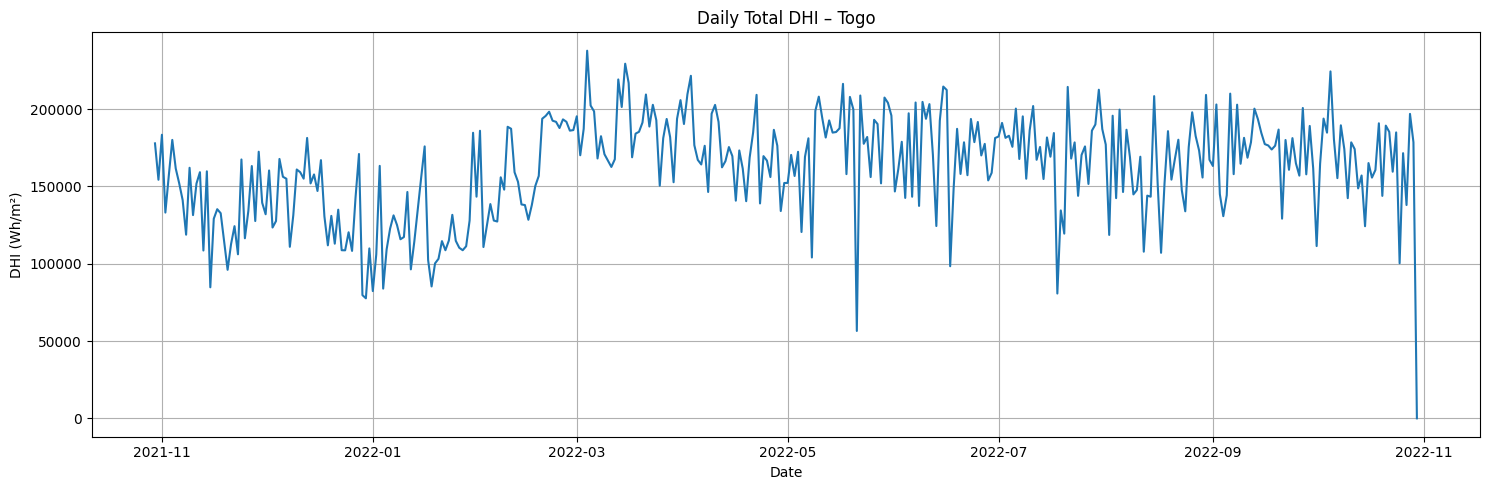

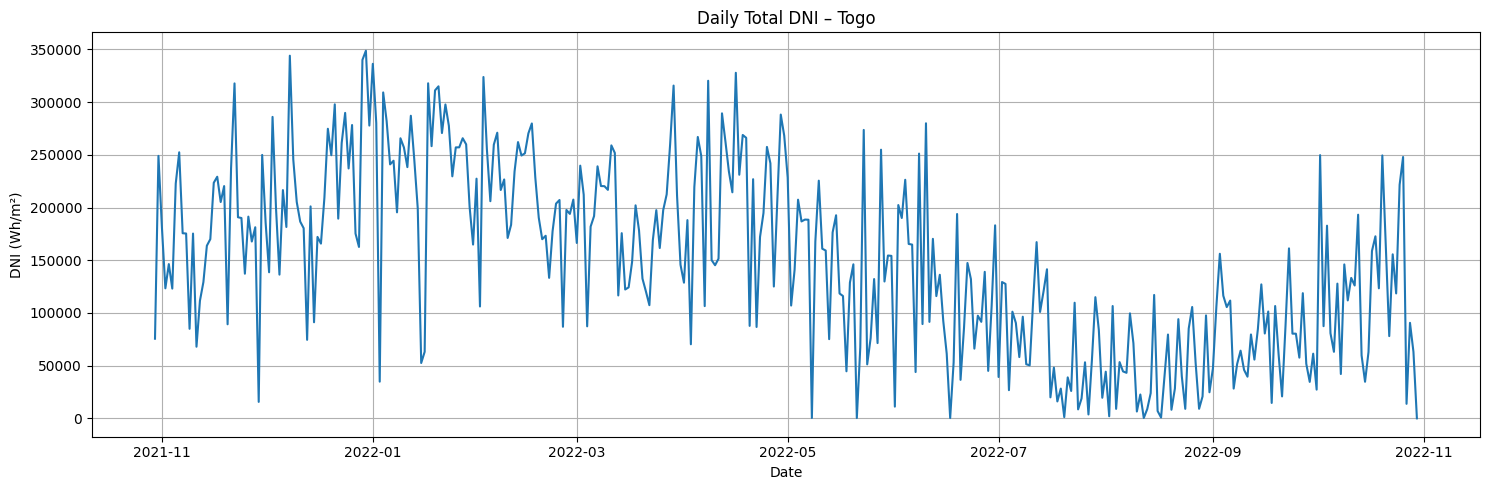

In [ ]:


df['Date'] = df['Timestamp'].dt.date
daily_ghi = df.groupby('Date')['GHI'].sum()

plt.figure(figsize=(15,5))
daily_ghi.plot()
plt.title("Daily Total GHI – sierraleone")
plt.xlabel("Date")
plt.ylabel("GHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


daily_dhi = df.groupby('Date')['DHI'].sum()
plt.figure(figsize=(15,5))
daily_dhi.plot()
plt.title("Daily Total DHI – sierraleone")
plt.xlabel("Date")
plt.ylabel("DHI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

Daily_dni = df.groupby('Date')['DNI'].sum()
plt.figure(figsize=(15,5))
Daily_dni.plot()
plt.title("Daily Total DNI – sierraleone")
plt.xlabel("Date")
plt.ylabel("DNI (Wh/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

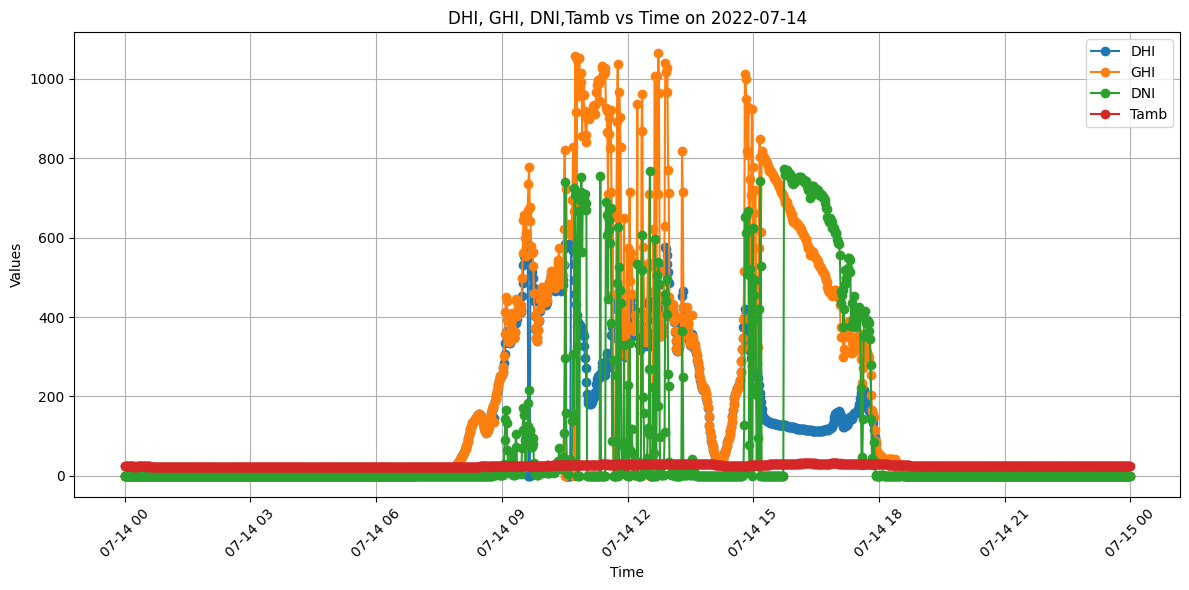

In [32]:
import random

# Select a random day from the dataset
random_day = random.choice(df['Timestamp'].dt.date.unique())

# Filter the data for the selected day
day_data = df[df['Timestamp'].dt.date == random_day]

# Plot DHI, GHI, and DNI against time
plt.figure(figsize=(12, 6))
plt.plot(day_data['Timestamp'], day_data['DHI'], label='DHI', marker='o')
plt.plot(day_data['Timestamp'], day_data['GHI'], label='GHI', marker='o')
plt.plot(day_data['Timestamp'], day_data['DNI'], label='DNI', marker='o')
plt.plot(day_data['Timestamp'], day_data['Tamb'], label='Tamb', marker='o')


plt.title(f"DHI, GHI, DNI,Tamb vs Time on {random_day}")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

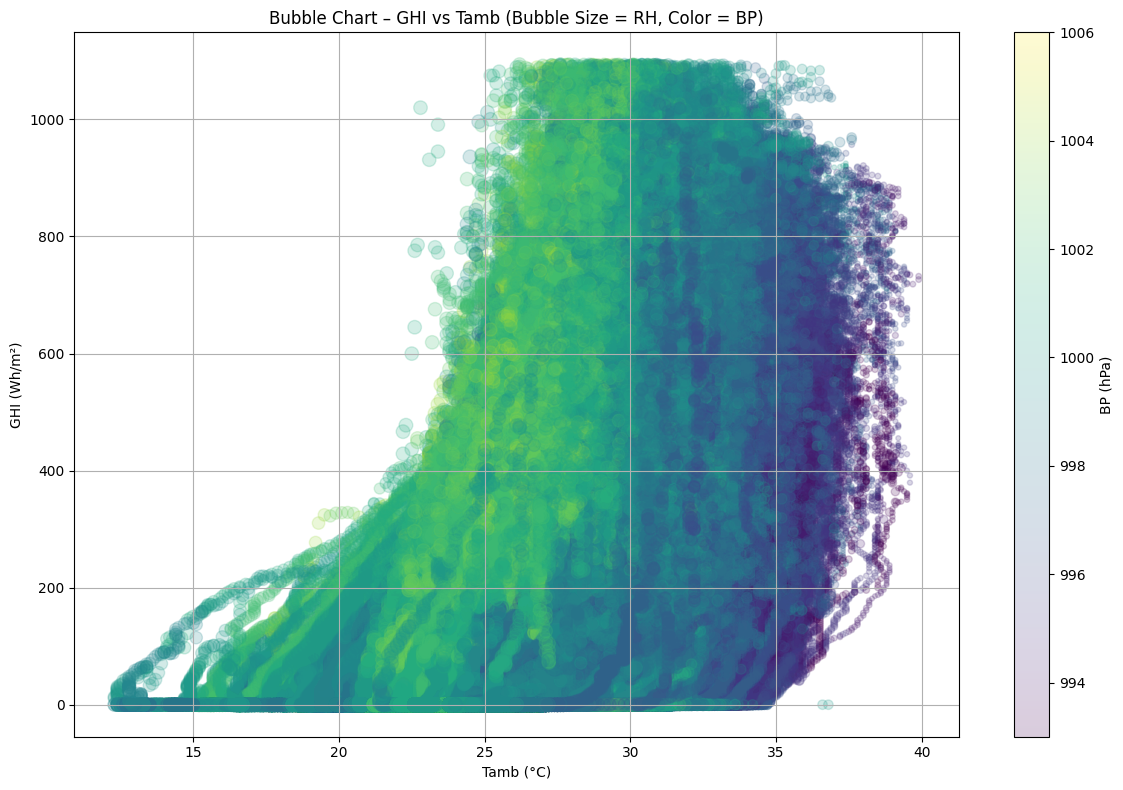

In [33]:
plt.figure(figsize=(12, 8))

# Create the bubble chart
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.2, c=df['BP'], cmap='viridis')

# Add labels and title
plt.title("Bubble Chart – GHI vs Tamb (Bubble Size = RH, Color = BP)")
plt.xlabel("Tamb (°C)")
plt.ylabel("GHI (Wh/m²)")
plt.colorbar(label="BP (hPa)")  # Color bar for BP
plt.grid(True)

plt.tight_layout()
plt.show()

In [48]:
# Calculate mean and median for DHI, GHI, and DNI
statistics = {
    "DHI": {"mean": df["DHI"].mean(), "median": df["DHI"].median()},
    "GHI": {"mean": df["GHI"].mean(), "median": df["GHI"].median()},
    "DNI": {"mean": df["DNI"].mean(), "median": df["DNI"].median()},
}

# Print the results
for key, value in statistics.items():
    print(f"{key} - Mean: {value['mean']}, Median: {value['median']}")

DHI - Mean: 113.29233875069728, Median: 0.0
GHI - Mean: 199.81999009061894, Median: 0.3
DNI - Mean: 106.20681288606681, Median: 0.0
